In [62]:
%reload_ext autoreload
%autoreload 2

import math
import sys
from pathlib import Path

import glob2
import numpy as np
import pandas as pd
from azureml.core import Dataset, Workspace
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import convert_age_from_days_to_years, extractqrcode, draw_sex_distribution, draw_age_distribution

### read the csv and total no. of children

In [63]:
DATASET_PATH = Path('/mnt/datasets/depthmap56k')

In [64]:
scans = pd.read_csv(DATASET_PATH / 'labels/scans.csv')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 2106


qrcode                                          person_id  \
0  1584997475-0195z663pl  DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...   
1  1584999865-01t0n240ra  lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...   
2  1583942091-02migjdla1  ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...   
3  1585011777-031jov4jpw  D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...   
4  1585003039-032hniw434  8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...   

    age     sex  Years  
0  1420    male      4  
1  1529  female      4  
2   945  female      3  
3   924    male      3  
4  1320  female      4

### getting the total of gender

2021-03-22 10:53:49,187 - INFO - female    1058
male      1048
Name: sex, dtype: int64 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 32


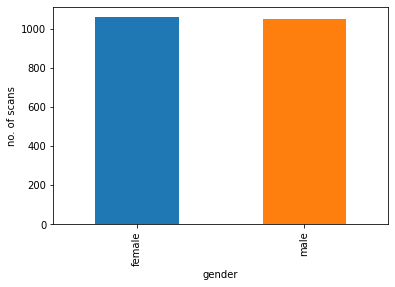

In [65]:
plt.figure()
draw_sex_distribution(scans)
plt.show()

In [66]:
#adding the Years column into dataframe
scans['Years'] = scans.apply(convert_age_from_days_to_years, axis=1)
scans.head()

qrcode                                          person_id  \
0  1584997475-0195z663pl  DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...   
1  1584999865-01t0n240ra  lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...   
2  1583942091-02migjdla1  ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...   
3  1585011777-031jov4jpw  D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...   
4  1585003039-032hniw434  8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...   

    age     sex  Years  
0  1420    male      4  
1  1529  female      4  
2   945  female      3  
3   924    male      3  
4  1320  female      4

### plotting the bar graph no. of children against age

2021-03-22 10:53:55,111 - INFO - 0     14
1     63
2    346
3    606
4    705
5    370
6      2
Name: Years, dtype: int64 - /mnt/resource/batch/tasks/shared/LS_root/mounts/clusters/jzcomp/code/Users/jziegler/cgm-ml/src/data_utils/dataset_EDA/data_utilities.py: line 24


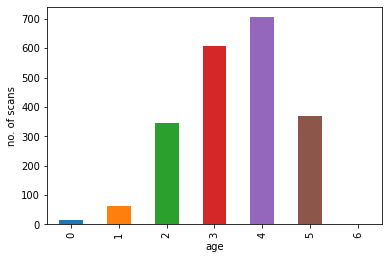

In [67]:
plt.figure()
draw_age_distribution(scans)
plt.show()

### getting the distribition based on gender

In [68]:
male = scans[scans['sex']=='male']
print('No. of male distribution: ')
print(male['Years'].value_counts())

No. of male distribution: 
4    365
3    282
5    189
2    176
1     29
0      7
Name: Years, dtype: int64


In [69]:
female = scans[scans['sex']=='female']
print('No. of female distribution: ')
print(female['Years'].value_counts())

No. of female distribution: 
4    340
3    324
5    181
2    170
1     34
0      7
6      2
Name: Years, dtype: int64


### Reading the csv files and get the data at artifacts level

In [70]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/artifacts.csv')
artifacts.head()

artifacts  \
0  pc_1584997475-0195z663pl_1591588126306_100_000...   
1  pc_1584997475-0195z663pl_1591588126306_100_001...   
2  pc_1584997475-0195z663pl_1591588126306_100_002...   
3  pc_1584997475-0195z663pl_1591588126306_100_003...   
4  pc_1584997475-0195z663pl_1591588126306_100_004...   

                                                  id  \
0  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
1  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
2  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
3  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
4  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   

                                        storage_path  height  weight    key  \
0  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
1  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
2  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
3  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
4  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   

    tag                 qrcode  
0  good  1584997475-0195z663pl  
1  good  1584997475-0195z663pl  
2  good  1584997475-0195z663pl  
3  good  1584997475-0195z663pl  
4  good  1584997475-0195z663pl

In [71]:
## dropping the null values from the artifacts 
artifacts  = artifacts.dropna()

In [72]:
print("Total no. of pointclouds:", len(artifacts ))

Total no. of pointclouds: 50149


101.0    21033
100.0    14843
102.0    14246
201.0       19
202.0        8
Name: key, dtype: int64


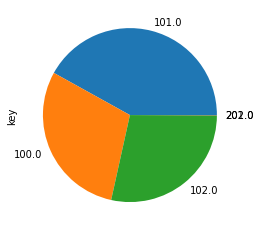

In [73]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

### plotting the height and weight distribution

In [74]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
artifacts.head()

artifacts  \
0  pc_1584997475-0195z663pl_1591588126306_100_000...   
1  pc_1584997475-0195z663pl_1591588126306_100_001...   
2  pc_1584997475-0195z663pl_1591588126306_100_002...   
3  pc_1584997475-0195z663pl_1591588126306_100_003...   
4  pc_1584997475-0195z663pl_1591588126306_100_004...   

                                                  id  \
0  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
1  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
2  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
3  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
4  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   

                                        storage_path  height  weight    key  \
0  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
1  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
2  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
3  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
4  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   

    tag                 qrcode  
0  good  1584997475-0195z663pl  
1  good  1584997475-0195z663pl  
2  good  1584997475-0195z663pl  
3  good  1584997475-0195z663pl  
4  good  1584997475-0195z663pl

In [75]:
getheight = artifacts.drop_duplicates(subset=['qrcode']).reset_index(drop=True)
getheight.head()

artifacts  \
0  pc_1584997475-0195z663pl_1591588126306_100_000...   
1  pc_1584999865-01t0n240ra_1591629837700_100_008...   
2  pc_1583942091-02migjdla1_1591470015961_100_000...   
3  pc_1585011777-031jov4jpw_1591815240163_100_000...   
4  pc_1585003039-032hniw434_1591707933084_102_000...   

                                                  id  \
0  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
1  lD0OAaaZ0pcD0zRk_artifact-scan-pcd_15700608000...   
2  ZPFkcYGhq15raY3J_artifact-scan-pcd_15736032000...   
3  D7tiN7CtUEM9WoRx_artifact-scan-pcd_15712704000...   
4  8SMAKMkY79LovcBU_artifact-scan-pcd_15708384000...   

                                        storage_path  height  weight    key  \
0  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
1  qrcode/1584999865-01t0n240ra/measure/159162983...    86.5   12.45  100.0   
2  qrcode/1583942091-02migjdla1/measure/159147001...    71.6    8.10  100.0   
3  qrcode/1585011777-031jov4jpw/measure/159181524...    78.5   11.75  100.0   
4  qrcode/1585003039-032hniw434/measure/159170793...   108.1   15.50  102.0   

    tag                 qrcode  
0  good  1584997475-0195z663pl  
1  good  1584999865-01t0n240ra  
2  good  1583942091-02migjdla1  
3  good  1585011777-031jov4jpw  
4  good  1585003039-032hniw434

In [76]:
print("Total no.unique scans:", len(getheight))

Total no.unique scans: 2106


Text(0, 0.5, 'height')

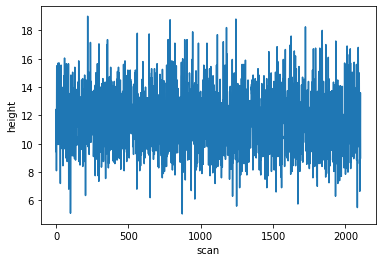

In [77]:
heightax = getheight['weight'].plot()
heightax.set_xlabel('scan')
heightax.set_ylabel('height')

Text(0.5, 0, 'weight')

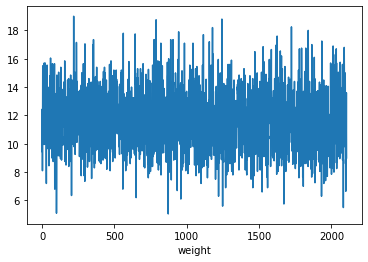

In [78]:
weightax = getheight['weight'].plot()
weightax.set_xlabel('scan')
weightax.set_xlabel('weight')

In [79]:
distribution_data = pd.merge(scans,getheight[['height','weight','qrcode']],on='qrcode', how='left')
distribution_data.head()

qrcode                                          person_id  \
0  1584997475-0195z663pl  DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...   
1  1584999865-01t0n240ra  lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...   
2  1583942091-02migjdla1  ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...   
3  1585011777-031jov4jpw  D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...   
4  1585003039-032hniw434  8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...   

    age     sex  Years  height  weight  
0  1420    male      4    85.7    9.45  
1  1529  female      4    86.5   12.45  
2   945  female      3    71.6    8.10  
3   924    male      3    78.5   11.75  
4  1320  female      4   108.1   15.50

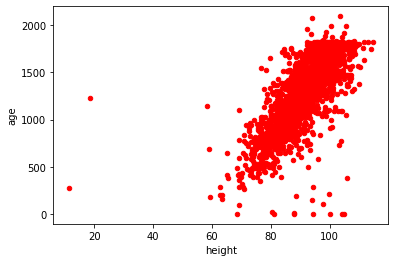

In [80]:
#distribution of height against age
height_vs_age = distribution_data.plot.scatter(x='height', y='age', c='red')

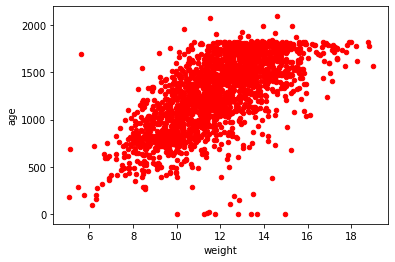

In [81]:
#distribution of weight against age
weight_vs_age = distribution_data.plot.scatter(x='weight', y='age', c='red')

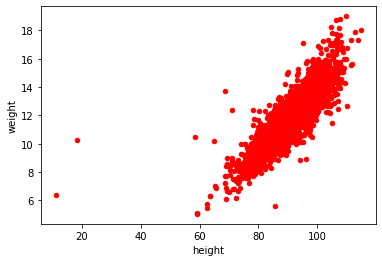

In [82]:
## distribution of height against weight
weight_vs_height = distribution_data.plot.scatter(x='height', y='weight', c='red')

#### Check age (all below 1 year)

In [99]:
# Children should be between 6 months and 6 years, otherwise we assume something went wrong
# data_utilities conver_age_from_days_to_years calls round() -> nearest integer
# What should we do with children age 0?

# ! hier scans nehmen anstatt "artifacts" wegen column Years - ist das richtig?
unusual_age_artifacts = distribution_data[(distribution_data.Years < 1) | (distribution_data.Years > 6)]
print("Number of unusual age artifacts: ", len(unusual_age_artifacts))

#drop duplicates
unusual_age_drop_dupl = unusual_age_artifacts.drop_duplicates(subset='qrcode', keep='first')
print("Number of unusual age artifacts, duplicates dropped: ", len(unusual_age_drop_dupl))

unusual_age_drop_dupl.head(14)


Number of unusual age artifacts:  14
Number of unusual age artifacts, duplicates dropped:  14


qrcode  \
69    1583831904-13qoxucgul   
320   1584996554-5hc50kbv5k   
449   1583850151-7lqggqjbfz   
533   1583998466-92e41regoe   
872   1585011244-en5qxroh2d   
959   1584999538-fwlijzba3n   
1176  1584993440-jt1q7jvcxk   
1184  1584996982-jw4772tp4t   
1220  1583997887-kjl2onswvl   
1411  1583462542-nvwrue6sak   
1871  1585004714-vvwdktbjr4   
2007  1584921649-y7mb71gtq5   
2015  1584995840-yc5e340qkf   
2085  1583462523-zolqj1h1so   

                                              person_id  age     sex  Years  \
69    qzk6GuKtR0nJJ7ji_person_1567814400000_Ka6cXUUt...    2  female      0   
320   7QbzulTXi4tZ3rlG_person_1569628800000_dtavojZQ...   25    male      0   
449   2OApaLtWO0slWkxB_person_1566518400000_OYvnUkyd...    9    male      0   
533   qJXsIstDJ5nLd31w_person_1568419200000_hpb6mIaE...    3    male      0   
872   ZXY745YzkU2LP7Dk_person_1571443200000_6KS0wXew...  179  female      0   
959   oDnVWFNtmHMtXRtD_person_1573603200000_1GsOtF99...   90  female      0   
1176  XcpVKoJtbudK3hZE_person_1569283200000_el1ZMYEL...    0    male      0   
1184  a6hnWvCJk4kR266B_person_1569801600000_HUC51v6r...    0  female      0   
1220  yHdKD1lu6TTcgeb2_person_1576108800000_zDY1eved...  160  female      0   
1411  spEIOWXCheWSMV4Q_person_1566691200000_Tz6y7U6Q...  107  female      0   
1871  SyQ2Bl1cUqoeecUu_person_1570060800000_A5Vko6c3...    0  female      0   
2007  mxZx13inkDr7Wy1N_person_1569024000000_qqdIUeZW...    0    male      0   
2015  WadGPmfc3YKYrbWZ_person_1573430400000_7Z8k92pr...    0    male      0   
2085  PtKkER5sA0qMo3m8_person_1566691200000_vV9xrEmX...  145    male      0   

      height  weight  
69      87.8   11.25  
320     80.5   11.50  
449     88.0   11.40  
533    104.0   12.80  
872     59.2    5.05  
959     69.0    6.10  
1176   100.2   13.40  
1184    68.5   13.70  
1220    63.5    6.30  
1411    97.7   12.45  
1871    94.2   11.75  
2007   104.7   14.95  
2015    81.0   10.00  
2085    93.9   12.85

#### Check weight

In [84]:
# weight vals for children betw. 6 months & 6 years
# Found some WHO tables, Bhavna also suggested taking these inputs
# 5 kg - 30 kg from tables
# todo: Bhavna wants to know number of children below 5kg

unusual_weight_artifacts = artifacts[(artifacts.weight < 5.0) | (artifacts.weight > 30.0)]
print("Number of unusual_weight_artifacts: ", len(unusual_weight_artifacts))

#drop duplicates
drop_dupl_weight = unusual_weight_artifacts.drop_duplicates(subset='qrcode', keep='first')
print("Number of unusual weight artifacts, duplicates dropped: ", len(drop_dupl_weight))

drop_dupl_weight.head()

Number of unusual_weight_artifacts:  0
Number of unusual weight artifacts, duplicates dropped:  0


Empty DataFrame
Columns: [artifacts, id, storage_path, height, weight, key, tag, qrcode]
Index: []

#### Check height

In [85]:
# Children should be between 40cm and 150cm tall, otherwise we assume something went wrong
unusual_height_artifacts = artifacts[(artifacts.height < 40.) | (artifacts.height > 150.)]
unusual_height_artifacts.head()

artifacts  \
4987  pc_1583997882-3jqstr1119_1591123012106_100_000...   
4988  pc_1583997882-3jqstr1119_1591123012106_100_001...   
4989  pc_1583997882-3jqstr1119_1591123012106_100_002...   
4990  pc_1583997882-3jqstr1119_1591123012106_100_003...   
4991  pc_1583997882-3jqstr1119_1591123012106_100_004...   

                                                     id  \
4987  OUe6BSGkpUyWFQQ8_artifact-scan-pcd_15761088000...   
4988  OUe6BSGkpUyWFQQ8_artifact-scan-pcd_15761088000...   
4989  OUe6BSGkpUyWFQQ8_artifact-scan-pcd_15761088000...   
4990  OUe6BSGkpUyWFQQ8_artifact-scan-pcd_15761088000...   
4991  OUe6BSGkpUyWFQQ8_artifact-scan-pcd_15761088000...   

                                           storage_path  height  weight  \
4987  qrcode/1583997882-3jqstr1119/measure/159112301...    11.3    6.35   
4988  qrcode/1583997882-3jqstr1119/measure/159112301...    11.3    6.35   
4989  qrcode/1583997882-3jqstr1119/measure/159112301...    11.3    6.35   
4990  qrcode/1583997882-3jqstr1119/measure/159112301...    11.3    6.35   
4991  qrcode/1583997882-3jqstr1119/measure/159112301...    11.3    6.35   

        key   tag                 qrcode  
4987  100.0  good  1583997882-3jqstr1119  
4988  100.0  good  1583997882-3jqstr1119  
4989  100.0  good  1583997882-3jqstr1119  
4990  100.0  good  1583997882-3jqstr1119  
4991  100.0  good  1583997882-3jqstr1119

In [86]:
print("Number of unusual height artifacts: ", len(unusual_height_artifacts))

#drop duplicates
drop_dupl_height = unusual_height_artifacts.drop_duplicates(subset='qrcode', keep='first')
print("Number of unusual height artifacts, duplicates dropped: ", len(drop_dupl_height))

drop_dupl_height.head()

Number of unusual height artifacts:  82
Number of unusual height artifacts, duplicates dropped:  3


artifacts  \
4987   pc_1583997882-3jqstr1119_1591123012106_100_000...   
18970  pc_1584998372-d85ogmqucw_1591618365119_100_000...   
30861  pc_1583855791-ldfc59ywg5_1591621942032_100_007...   

                                                      id  \
4987   OUe6BSGkpUyWFQQ8_artifact-scan-pcd_15761088000...   
18970  j3o5GQOSEoJG1dIA_artifact-scan-pcd_15700608000...   
30861  HCXuFKoc6Rzib6Oc_artifact-scan-pcd_15681600000...   

                                            storage_path  height  weight  \
4987   qrcode/1583997882-3jqstr1119/measure/159112301...    11.3    6.35   
18970  qrcode/1584998372-d85ogmqucw/measure/159161836...    18.5   10.30   
30861  qrcode/1583855791-ldfc59ywg5/measure/159162194...    12.3   12.60   

         key   tag                 qrcode  
4987   100.0  good  1583997882-3jqstr1119  
18970  100.0  good  1584998372-d85ogmqucw  
30861  100.0  good  1583855791-ldfc59ywg5

### Save unusual qr codes

##### HEIGHT

In [87]:
def get_qrcode(artifact:str) -> str:
    return artifact.split('_')[1]

In [89]:
print(drop_dupl_height.artifacts.values)

['pc_1583997882-3jqstr1119_1591123012106_100_000.pcd'
 'pc_1584998372-d85ogmqucw_1591618365119_100_000.pcd'
 'pc_1583855791-ldfc59ywg5_1591621942032_100_007.pcd']


In [91]:
print(len(drop_dupl_height))

unusual_qrcodes_height = [get_qrcode(artifact) for artifact in drop_dupl_height.artifacts.values]
print(unusual_qrcodes_height)
print(len(unusual_qrcodes_height))

3
['1583997882-3jqstr1119', '1584998372-d85ogmqucw', '1583855791-ldfc59ywg5']
3


In [92]:
set(unusual_qrcodes_height)

{'1583855791-ldfc59ywg5', '1583997882-3jqstr1119', '1584998372-d85ogmqucw'}

##### WEIGHT - no unusual qrcodes

##### AGE > 6 years - no unusual qrcodes

##### AGE < 6 months

In [116]:
artifacts.head()

artifacts  \
0  pc_1584997475-0195z663pl_1591588126306_100_000...   
1  pc_1584997475-0195z663pl_1591588126306_100_001...   
2  pc_1584997475-0195z663pl_1591588126306_100_002...   
3  pc_1584997475-0195z663pl_1591588126306_100_003...   
4  pc_1584997475-0195z663pl_1591588126306_100_004...   

                                                  id  \
0  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
1  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
2  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
3  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   
4  DQKAiT6cSJkQW2ya_artifact-scan-pcd_15698880000...   

                                        storage_path  height  weight    key  \
0  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
1  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
2  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
3  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   
4  qrcode/1584997475-0195z663pl/measure/159158812...    85.7    9.45  100.0   

    tag                 qrcode  
0  good  1584997475-0195z663pl  
1  good  1584997475-0195z663pl  
2  good  1584997475-0195z663pl  
3  good  1584997475-0195z663pl  
4  good  1584997475-0195z663pl

In [118]:
print(artifacts.qrcode[0])

1584997475-0195z663pl


In [104]:
####GET QR CODE OUT HERE!
print(artifacts.artifacts.values)

['pc_1584997475-0195z663pl_1591588126306_100_000.pcd'
 'pc_1584997475-0195z663pl_1591588126306_100_001.pcd'
 'pc_1584997475-0195z663pl_1591588126306_100_002.pcd' ...
 'pc_1584997800-zyyf95jn3v_1591617422969_102_004.pcd'
 'pc_1584997800-zyyf95jn3v_1591617422969_102_005.pcd'
 'pc_1584997800-zyyf95jn3v_1591617422969_102_006.pcd']


In [107]:
unusual_age_drop_dupl.head()

qrcode                                          person_id  \
69   1583831904-13qoxucgul  qzk6GuKtR0nJJ7ji_person_1567814400000_Ka6cXUUt...   
320  1584996554-5hc50kbv5k  7QbzulTXi4tZ3rlG_person_1569628800000_dtavojZQ...   
449  1583850151-7lqggqjbfz  2OApaLtWO0slWkxB_person_1566518400000_OYvnUkyd...   
533  1583998466-92e41regoe  qJXsIstDJ5nLd31w_person_1568419200000_hpb6mIaE...   
872  1585011244-en5qxroh2d  ZXY745YzkU2LP7Dk_person_1571443200000_6KS0wXew...   

     age     sex  Years  height  weight  
69     2  female      0    87.8   11.25  
320   25    male      0    80.5   11.50  
449    9    male      0    88.0   11.40  
533    3    male      0   104.0   12.80  
872  179  female      0    59.2    5.05

In [123]:
print(len(unusual_age_drop_dupl))

unusual_qrcodes_age = unusual_age_drop_dupl.qrcode
#unusual_qrcodes_age = [unusual_age_drop_dupl.qrcode[artifact] for artifact in drop_dupl_height.artifact.values]
print(unusual_qrcodes_age)
print(len(unusual_qrcodes_age))
set(unusual_qrcodes_age)

14
69      1583831904-13qoxucgul
320     1584996554-5hc50kbv5k
449     1583850151-7lqggqjbfz
533     1583998466-92e41regoe
872     1585011244-en5qxroh2d
959     1584999538-fwlijzba3n
1176    1584993440-jt1q7jvcxk
1184    1584996982-jw4772tp4t
1220    1583997887-kjl2onswvl
1411    1583462542-nvwrue6sak
1871    1585004714-vvwdktbjr4
2007    1584921649-y7mb71gtq5
2015    1584995840-yc5e340qkf
2085    1583462523-zolqj1h1so
Name: qrcode, dtype: object
14


{'1583462523-zolqj1h1so',
 '1583462542-nvwrue6sak',
 '1583831904-13qoxucgul',
 '1583850151-7lqggqjbfz',
 '1583997887-kjl2onswvl',
 '1583998466-92e41regoe',
 '1584921649-y7mb71gtq5',
 '1584993440-jt1q7jvcxk',
 '1584995840-yc5e340qkf',
 '1584996554-5hc50kbv5k',
 '1584996982-jw4772tp4t',
 '1584999538-fwlijzba3n',
 '1585004714-vvwdktbjr4',
 '1585011244-en5qxroh2d'}

## Check on the amount of artifacts and scans from the dataset

In [22]:
# Takes approx 12 min
dataset = glob2.glob(str(DATASET_PATH / 'qrcode/**/*.pcd'))
len(dataset)

KeyboardInterrupt: 

In [108]:
print("Total no. of pointclouds in csv:", len(artifacts))
print("Total no. of pointclouds in dataset:", len(dataset))

Total no. of pointclouds in csv: 50149
Total no. of pointclouds in dataset: 0


In [109]:
## extracting the qrcodes
qrcodes_data = []
for path in dataset:
    data =path.split('/')
    qrcodes_data.append(data[4])
qrc_dataframe = pd.DataFrame(qrcodes_data,columns=['qrcodes'])

In [110]:
print("Total no. of scans in dataset:", len(qrc_dataframe['qrcodes'].unique()))
print("Total no. of scans in csv:", len(scans))      

Total no. of scans in dataset: 0
Total no. of scans in csv: 2106
